# Ridge Regression (interpretation)

# Fire up graphlab create

In [3]:
import graphlab
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

[INFO] GraphLab Create v1.8.3 started. Logging: /tmp/graphlab_server_1464122802.log


# Polynomial regression, revisited

Build on previous material: function to produce an SFrame with columns containing the powers of a given input. (Same as in earlier notebook.)

In [2]:
def polynomial_sframe(feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    poly_sframe = graphlab.SFrame()
    # and set poly_sframe['power_1'] equal to the passed feature
    poly_sframe['power_1'] = feature

    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        for power in range(2, degree + 1): 
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # then assign poly_sframe[name] to the appropriate power of feature
            poly_sframe[name] = feature.apply(lambda x: x ** power)

    return poly_sframe

In [4]:
sales = graphlab.SFrame('kc_house_data.gl/')

As before, use the sqft_living variable. For plotting purposes sort by the values of sqft_living. For houses with identical square footage, then by prices.

In [5]:
sales = sales.sort(['sqft_living','price'])

Generate polynomial features up to degree 15 using `polynomial_sframe()` and fit a model with these features.

In [6]:
l2_small_penalty = 1e-5
poly15 = polynomial_sframe(sales['sqft_living'], 15)
poly15.head()

power_1,power_2,power_3,power_4,power_5,power_6,power_7
290.0,84100.0,24389000.0,7072810000.0,2.0511149e+12,5.94823321e+14,1.7249876309e+17
370.0,136900.0,50653000.0,18741610000.0,6.9343957e+12,2.565726409e+15,9.4931877133e+17
380.0,144400.0,54872000.0,20851360000.0,7.9235168e+12,3.010936384e+15,1.14415582592e+18
384.0,147456.0,56623104.0,21743271936.0,8.34941642342e+12,3.20617590659e+15,1.23117154813e+18
390.0,152100.0,59319000.0,23134410000.0,9.0224199e+12,3.518743761e+15,1.37231006679e+18
390.0,152100.0,59319000.0,23134410000.0,9.0224199e+12,3.518743761e+15,1.37231006679e+18
410.0,168100.0,68921000.0,28257610000.0,1.15856201e+13,4.750104241e+15,1.94754273881e+18
420.0,176400.0,74088000.0,31116960000.0,1.30691232e+13,5.489031744e+15,2.30539333248e+18
420.0,176400.0,74088000.0,31116960000.0,1.30691232e+13,5.489031744e+15,2.30539333248e+18
430.0,184900.0,79507000.0,34188010000.0,1.47008443e+13,6.321363049e+15,2.71818611107e+18


Note: When we have so many features relative to data points, the solution can become highly numerically unstable.  Thus, rather than using no regularization, introduce a tiny amount of regularization (`l2_penalty=1e-5`) to make the solution more numerically stable.

With the L2 penalty specified above, fit the model and print out the learned weights.

In [7]:
features = poly15.column_names()
poly15['price'] = sales['price']
mod1 = graphlab.linear_regression.create(
    poly15, target = 'price', features = features, validation_set = None, l2_penalty = l2_small_penalty)
mod1.get('coefficients')

name,index,value,stderr
(intercept),None,167924.855861,932257.186892
power_1,None,103.09095592,4735.64035967
power_2,None,0.13460454755,9.85916588414
power_3,None,-0.000129071363621,0.0111681951166
power_4,None,5.18928964915e-08,7.69612916365e-06
power_5,None,-7.77169343059e-12,3.40375275378e-09
power_6,None,1.71144917832e-16,9.86487804671e-13
power_7,None,4.51177946027e-20,1.85595593561e-16
power_8,None,-4.78840959928e-25,2.13680012359e-20
power_9,None,-2.33343401694e-28,1.22638025544e-24


# Observe overfitting

In earlier notebooks, polynomial fit of degree 15 was highly sensitive to (subsets of) the data. The model had *high variance*. Ridge regression reduces such variance.... 

Split the data into four subsets of roughly equal sizes: `set_1`, `set_2`, `set_3`, and `set_4`.

In [8]:
(semi_split1, semi_split2) = sales.random_split(0.5, seed = 0)
(set1, set2) = semi_split1.random_split(0.5, seed = 0)
(set3, set4) = semi_split2.random_split(0.5, seed = 0)

set_1 = polynomial_sframe(set1['sqft_living'], 15)
set_1['price'] = set1['price']
set_2 = polynomial_sframe(set2['sqft_living'], 15)
set_2['price'] = set2['price']
set_3 = polynomial_sframe(set3['sqft_living'], 15)
set_3['price'] = set3['price']
set_4 = polynomial_sframe(set4['sqft_living'], 15)
set_4['price'] = set4['price']

Fit a 15th degree polynomial on each set using 'sqft_living' to predict prices. 
Print the weights and plot.

mod_s1: +-------------+-------+--------------------+-------------------+
|     name    | index |       value        |       stderr      |
+-------------+-------+--------------------+-------------------+
| (intercept) |  None |    9306.4606221    |   1255976.06157   |
|   power_1   |  None |   585.865823394    |   6003.28876462   |
|   power_2   |  None |  -0.397305895643   |   11.9613259026   |
|   power_3   |  None | 0.000141470900599  |  0.0131345206929  |
|   power_4   |  None | -1.52945989958e-08 | 8.84846297281e-06 |
|   power_5   |  None | -3.79756325772e-13 | 3.83736176297e-09 |
|   power_6   |  None | 5.97481763253e-17  | 1.08407665704e-12 |
|   power_7   |  None | 1.06888504767e-20  | 1.93500977266e-16 |
|   power_8   |  None | 1.59344027887e-25  | 1.89384579435e-20 |
|   power_9   |  None | -6.92834984105e-29 |        nan        |
|   power_10  |  None | -6.83813287347e-33 | 3.49595202136e-29 |
|   power_11  |  None | -1.62686187633e-37 | 2.50639941958e-33 |
|   power_12  |  

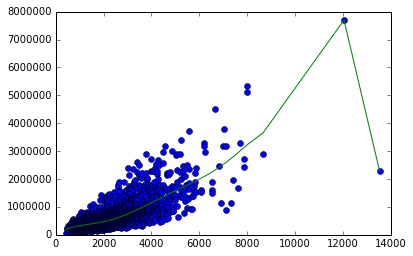

In [17]:
mod_s1 = graphlab.linear_regression.create(set_1, 
                                           target = 'price', 
                                           features = features, 
                                           validation_set = None, 
                                           l2_penalty = l2_small_penalty, 
                                           verbose = False)
print "mod_s1:", mod_s1.get('coefficients').print_rows(num_rows = 16)
plt.plot(set_1['power_1'], set_1['price'], 'o',
         set_1['power_1'], mod_s1.predict(set_1), 'g-')

mod_s2: +-------------+-------+--------------------+-------------------+
|     name    | index |       value        |       stderr      |
+-------------+-------+--------------------+-------------------+
| (intercept) |  None |   -25115.9044254   |   1573017.12178   |
|   power_1   |  None |    783.49380028    |   9293.98471763   |
|   power_2   |  None |  -0.767759302942   |   23.3971636819   |
|   power_3   |  None | 0.000438766369254  |  0.0331210085962  |
|   power_4   |  None | -1.15169166858e-07 | 2.93724988829e-05 |
|   power_5   |  None | 6.84281360981e-12  | 1.72037616446e-08 |
|   power_6   |  None | 2.51195187082e-15  | 6.82484060777e-12 |
|   power_7   |  None | -2.06440608259e-19 | 1.84509003318e-15 |
|   power_8   |  None | -4.59673022352e-23 | 3.35295936015e-19 |
|   power_9   |  None | -2.71279236963e-29 | 3.78708790458e-23 |
|   power_10  |  None | 6.21818431996e-31  |        nan        |
|   power_11  |  None | 6.51741386006e-35  |        nan        |
|   power_12  |  

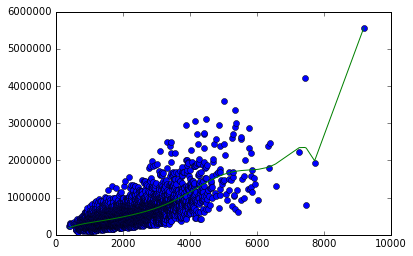

In [18]:
mod_s2 = graphlab.linear_regression.create(set_2, 
                                           target = 'price', 
                                           features = features, 
                                           validation_set = None, 
                                           l2_penalty = l2_small_penalty, 
                                           verbose = False)
print 'mod_s2:', mod_s2.get('coefficients').print_rows(num_rows = 16)
plt.plot(set_2['power_1'], set_2['price'], 'o',
         set_2['power_1'], mod_s2.predict(set_2), 'g-')

mod_s3: +-------------+-------+--------------------+-------------------+
|     name    | index |       value        |       stderr      |
+-------------+-------+--------------------+-------------------+
| (intercept) |  None |   462426.565731    |        nan        |
|   power_1   |  None |   -759.251842854   |        nan        |
|   power_2   |  None |    1.0286700473    |        nan        |
|   power_3   |  None | -0.000528264527386 |        nan        |
|   power_4   |  None | 1.15422908385e-07  |        nan        |
|   power_5   |  None | -2.26095948062e-12 |        nan        |
|   power_6   |  None | -2.08214287571e-15 |        nan        |
|   power_7   |  None | 4.08770475709e-20  |        nan        |
|   power_8   |  None |  2.570791329e-23   |        nan        |
|   power_9   |  None | 1.24311265196e-27  |        nan        |
|   power_10  |  None | -1.72025834939e-31 |        nan        |
|   power_11  |  None | -2.96761071315e-35 |        nan        |
|   power_12  |  

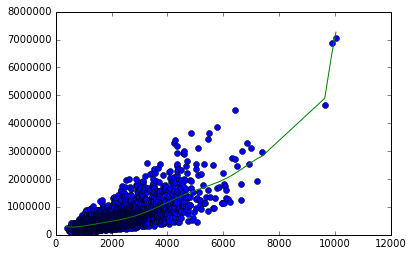

In [19]:
mod_s3 = graphlab.linear_regression.create(set_3, 
                                           target = 'price', 
                                           features = features, 
                                           validation_set = None, 
                                           l2_penalty = l2_small_penalty,
                                           verbose = False)
print 'mod_s3:', mod_s3.get('coefficients').print_rows(num_rows = 16)
plt.plot(set_3['power_1'], set_3['price'], 'o',
         set_3['power_1'], mod_s3.predict(set_3), 'g-')

mod_s4: +-------------+-------+--------------------+-------------------+
|     name    | index |       value        |       stderr      |
+-------------+-------+--------------------+-------------------+
| (intercept) |  None |   -170240.032842   |   1543796.62885   |
|   power_1   |  None |   1247.59034541    |   9978.42791287   |
|   power_2   |  None |   -1.22460912177   |   26.7138477947   |
|   power_3   |  None | 0.000555254626344  |  0.0392072641565  |
|   power_4   |  None | -6.3826237386e-08  | 3.51264407588e-05 |
|   power_5   |  None | -2.20215991142e-11 | 2.00572757169e-08 |
|   power_6   |  None | 4.81834694285e-15  | 7.23449143456e-12 |
|   power_7   |  None | 4.21461612787e-19  | 1.43057715883e-15 |
|   power_8   |  None | -7.99880736276e-23 |        nan        |
|   power_9   |  None | -1.32365897487e-26 |        nan        |
|   power_10  |  None | 1.60197622166e-31  |  5.6453113885e-27 |
|   power_11  |  None | 2.39904337319e-34  | 9.66784867829e-31 |
|   power_12  |  

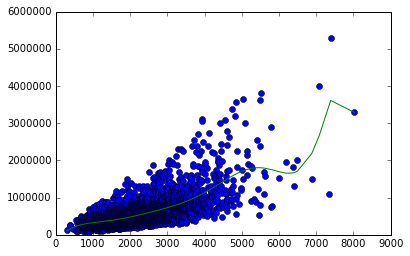

In [20]:
mod_s4 = graphlab.linear_regression.create(set_4, 
                                           target = 'price', 
                                           features = features, 
                                           validation_set = None, 
                                           l2_penalty = l2_small_penalty,
                                           verbose = False)
print 'mod_s4:', mod_s4.get('coefficients').print_rows(num_rows = 16)
plt.plot(set_4['power_1'], set_4['price'], 'o',
         set_4['power_1'], mod_s4.predict(set_4), 'g-')

# Ridge regression comes to rescue

Generally, whenever weights change so much in response to change in data, the variance of our estimate is large. Ridge regression aims to address this issue by penalizing "large" weights.

Repeat models with larger l2 penalty.

mod_s1b: +-------------+-------+-------------------+-------------------+
|     name    | index |       value       |       stderr      |
+-------------+-------+-------------------+-------------------+
| (intercept) |  None |   530317.024516   |   1890090.19151   |
|   power_1   |  None |   2.58738875673   |   9034.21455077   |
|   power_2   |  None |  0.00127414400592 |    18.000330944   |
|   power_3   |  None | 1.74934226932e-07 |   0.019765845458  |
|   power_4   |  None | 1.06022119097e-11 | 1.33158533722e-05 |
|   power_5   |  None | 5.42247604482e-16 | 5.77475960841e-09 |
|   power_6   |  None | 2.89563828343e-20 | 1.63140263499e-12 |
|   power_7   |  None | 1.65000666351e-24 | 2.91195278612e-16 |
|   power_8   |  None | 9.86081528409e-29 | 2.85000603886e-20 |
|   power_9   |  None | 6.06589348254e-33 |        nan        |
|   power_10  |  None |  3.7891786887e-37 | 5.26097974934e-29 |
|   power_11  |  None | 2.38223121312e-41 | 3.77182424405e-33 |
|   power_12  |  None | 1.49847

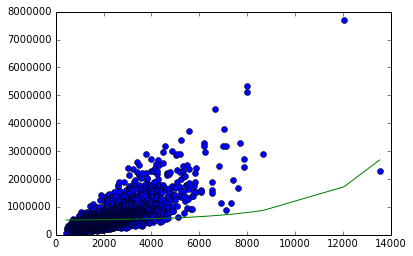

In [22]:
mod_s1b = graphlab.linear_regression.create(
    set_1, target = 'price', features = features, validation_set = None, l2_penalty = 1e5, verbose = False)
print 'mod_s1b:', mod_s1b.get('coefficients').print_rows(num_rows = 16)
plt.plot(set_1['power_1'], set_1['price'], 'o',
         set_1['power_1'], mod_s1b.predict(set_1), 'g-')

mod_s2b: +-------------+-------+-------------------+-------------------+
|     name    | index |       value       |       stderr      |
+-------------+-------+-------------------+-------------------+
| (intercept) |  None |   519216.897383   |   2167962.96521   |
|   power_1   |  None |   2.04470474182   |   12809.1515268   |
|   power_2   |  None |  0.0011314362684  |   32.2464286313   |
|   power_3   |  None | 2.93074277549e-07 |  0.0456480218892  |
|   power_4   |  None | 4.43540598453e-11 |  4.0481752482e-05 |
|   power_5   |  None | 4.80849112204e-15 | 2.37105608016e-08 |
|   power_6   |  None | 4.53091707826e-19 | 9.40612881847e-12 |
|   power_7   |  None | 4.16042910575e-23 | 2.54293917341e-15 |
|   power_8   |  None | 3.90094635128e-27 | 4.62111417353e-19 |
|   power_9   |  None |  3.7773187602e-31 | 5.21943862496e-23 |
|   power_10  |  None | 3.76650326842e-35 |        nan        |
|   power_11  |  None | 3.84228094754e-39 |        nan        |
|   power_12  |  None | 3.98520

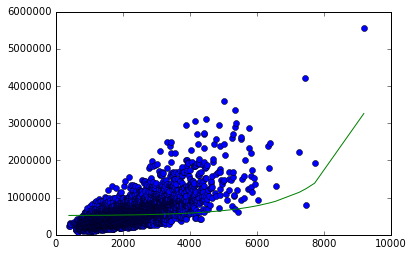

In [23]:
mod_s2b = graphlab.linear_regression.create(
    set_2, target = 'price', features = features, validation_set = None, l2_penalty = 1e5, verbose = False)
print 'mod_s2b:', mod_s2b.get('coefficients').print_rows(num_rows = 16)
plt.plot(set_2['power_1'], set_2['price'], 'o',
         set_2['power_1'], mod_s2b.predict(set_2), 'g-')

mod_s3b: +-------------+-------+-------------------+-------------------+
|     name    | index |       value       |       stderr      |
+-------------+-------+-------------------+-------------------+
| (intercept) |  None |   530317.024516   |   1890090.19151   |
|   power_1   |  None |   2.58738875673   |   9034.21455077   |
|   power_2   |  None |  0.00127414400592 |    18.000330944   |
|   power_3   |  None | 1.74934226932e-07 |   0.019765845458  |
|   power_4   |  None | 1.06022119097e-11 | 1.33158533722e-05 |
|   power_5   |  None | 5.42247604482e-16 | 5.77475960841e-09 |
|   power_6   |  None | 2.89563828343e-20 | 1.63140263499e-12 |
|   power_7   |  None | 1.65000666351e-24 | 2.91195278612e-16 |
|   power_8   |  None | 9.86081528409e-29 | 2.85000603886e-20 |
|   power_9   |  None | 6.06589348254e-33 |        nan        |
|   power_10  |  None |  3.7891786887e-37 | 5.26097974934e-29 |
|   power_11  |  None | 2.38223121312e-41 | 3.77182424405e-33 |
|   power_12  |  None | 1.49847

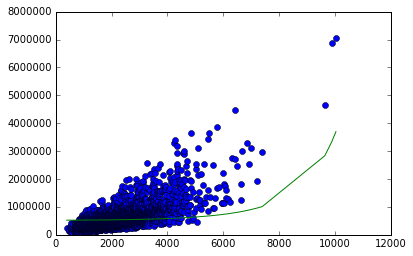

In [24]:
mod_s3b = graphlab.linear_regression.create(
    set_3, target = 'price', features = features, validation_set = None, l2_penalty = 1e5, verbose = False)
print 'mod_s3b:', mod_s1b.get('coefficients').print_rows(num_rows = 16)
plt.plot(set_3['power_1'], set_3['price'], 'o',
         set_3['power_1'], mod_s3b.predict(set_3), 'g-')

mod_s4b: +-------------+-------+-------------------+-------------------+
|     name    | index |       value       |       stderr      |
+-------------+-------+-------------------+-------------------+
| (intercept) |  None |   530317.024516   |   1890090.19151   |
|   power_1   |  None |   2.58738875673   |   9034.21455077   |
|   power_2   |  None |  0.00127414400592 |    18.000330944   |
|   power_3   |  None | 1.74934226932e-07 |   0.019765845458  |
|   power_4   |  None | 1.06022119097e-11 | 1.33158533722e-05 |
|   power_5   |  None | 5.42247604482e-16 | 5.77475960841e-09 |
|   power_6   |  None | 2.89563828343e-20 | 1.63140263499e-12 |
|   power_7   |  None | 1.65000666351e-24 | 2.91195278612e-16 |
|   power_8   |  None | 9.86081528409e-29 | 2.85000603886e-20 |
|   power_9   |  None | 6.06589348254e-33 |        nan        |
|   power_10  |  None |  3.7891786887e-37 | 5.26097974934e-29 |
|   power_11  |  None | 2.38223121312e-41 | 3.77182424405e-33 |
|   power_12  |  None | 1.49847

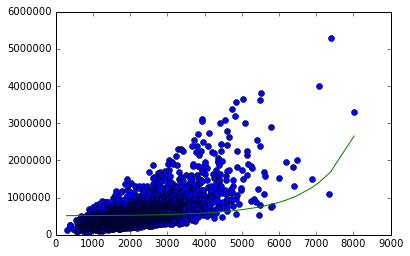

In [25]:
mod_s4b = graphlab.linear_regression.create(
    set_4, target = 'price', features = features, validation_set = None, l2_penalty = 1e5, verbose = False)
print 'mod_s4b:', mod_s1b.get('coefficients').print_rows(num_rows = 16)
plt.plot(set_4['power_1'], set_4['price'], 'o',
         set_4['power_1'], mod_s4b.predict(set_4), 'g-')

These curves vary a lot less, now that there is a high degree of regularization. (However, the fit does not appear well-matched to the data.)

# Selecting an L2 penalty via cross-validation

Just like the polynomial degree, the L2 penalty is a "magic" parameter that needs to be tuned. 

Implement a **k-fold cross-validation** to test different l2 penalty values.

In [26]:
(train_valid, test) = sales.random_split(0.9, seed = 1)
train_valid_shuffled = graphlab.toolkits.cross_validation.shuffle(train_valid, random_seed = 1)

Once the data are shuffled, divide it into equal segments. Each segment should receive `n/k` elements, where `n` is the number of observations in the training set and `k` is the number of segments (folds).

In [27]:
# Split n data points into k folds:
n = len(train_valid_shuffled)
k = 10 # 10-fold cross-validation

for i in xrange(k):
    start = (n * i) / k
    end = (n * (i + 1)) / k - 1
    print i, (start, end)

0 (0, 1938)
1 (1939, 3878)
2 (3879, 5817)
3 (5818, 7757)
4 (7758, 9697)
5 (9698, 11636)
6 (11637, 13576)
7 (13577, 15515)
8 (15516, 17455)
9 (17456, 19395)


Implement k-fold cross-validation. 
Function that computes k validation errors by designating each of the k segments as the validation set. It accepts as parameters (i) `k`, (ii) `l2_penalty`, (iii) dataframe, (iv) name of output column (e.g. `price`) and (v) list of feature names. The function returns the average validation error using k segments as validation sets.

In [28]:
def k_fold_cross_validation(k, l2_penalty, data, output_name, features_list):
    n = len(data)
    fold_size = n / k
    total_rss = 0
    
    for fold in xrange(k):
        fold_start = fold * fold_size
        
        validation = data[fold_start:(fold_start + fold_size)]
        test_pre = data[0:fold_start]
        test_post = data[(fold_start + fold_size):n]
        test = test_pre.append(test_post)
        
        # Check to make sure no off-by-one errors
        #print n, len(validation) + len(test)

        mod = graphlab.linear_regression.create(test, 
                                                target = output_name, 
                                                features = features_list, 
                                                validation_set = None, 
                                                l2_penalty = l2_penalty, 
                                                verbose = False)
        
        preds = mod.predict(validation)
        error = preds - validation['price']
        total_rss += sum(error ** 2)

    return total_rss / k
        
# Test: 
k_fold_cross_validation(10, 1, train_valid_shuffled, 'price', ['sqft_living'])

134850808662420.03

With a function to compute the average validation error for a model, write a loop to find the model that minimizes the average validation error. 

In [29]:
poly_data = polynomial_sframe(train_valid_shuffled['sqft_living'], 15)
features = poly_data.column_names()
poly_data['price'] = train_valid_shuffled['price']

In [30]:
lambdas = np.logspace(1, 7, num = 13)
cv_error = []

for l2_penalty in lambdas:
    mean_rss = k_fold_cross_validation(
        k = 10, l2_penalty = l2_penalty, data = poly_data, output_name = 'price', features_list = features)
    cv_error.append(mean_rss)
    
for i in range(len(lambdas)):
    print 'cv_error:', cv_error[i], 'lambda:', lambdas[i]

cv_error: 4.88057835192e+14 lambda: 10.0
cv_error: 2.86132826469e+14 lambda: 31.6227766017
cv_error: 1.60735810577e+14 lambda: 100.0
cv_error: 1.22072906426e+14 lambda: 316.227766017
cv_error: 1.2110792746e+14 lambda: 1000.0
cv_error: 1.23875845391e+14 lambda: 3162.27766017
cv_error: 1.3673874081e+14 lambda: 10000.0
cv_error: 1.71609557262e+14 lambda: 31622.7766017
cv_error: 2.29211642781e+14 lambda: 100000.0
cv_error: 2.52765606075e+14 lambda: 316227.766017
cv_error: 2.58502792328e+14 lambda: 1000000.0
cv_error: 2.62638750458e+14 lambda: 3162277.66017
cv_error: 2.64708030084e+14 lambda: 10000000.0


Plot the k-fold cross-validation errors you have obtained to better understand the behavior of the method.  

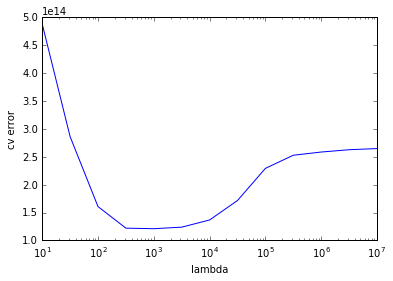

In [31]:
# Plot the l2_penalty values in the x axis and the cross-validation error in the y axis.
# Using plt.xscale('log') will make your plot more intuitive.
plt.xscale('log')
plt.plot(lambdas, cv_error, '-')
plt.xlabel('lambda')
plt.ylabel('cv error')

With the best value for the L2 penalty using cross-validation, retrain a final model on all of the training data using this value of `l2_penalty` (i.e., train on the entire dataset).

In [32]:
test_poly = polynomial_sframe(test['sqft_living'], 15)
test_poly['price'] = test['price']

***QUIZ QUESTION: Using the best L2 penalty found above, train a model using all training data. What is the RSS on the TEST data of the model you learn with this L2 penalty? ***

rss: 1.28780855058e+14


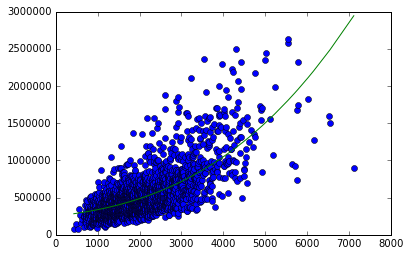

In [33]:
best_lambda = 1000.0
test_mod = graphlab.linear_regression.create(poly_data, 
                                             target = 'price',
                                             features = features, 
                                             validation_set = None, 
                                             l2_penalty = best_lambda, 
                                             verbose = False)
# test_mod.get('coefficients') 
preds = test_mod.predict(test_poly)
error = test_poly['price'] - preds
rss = sum(error ** 2)
print 'rss:', rss

plt.plot(test_poly['power_1'], test_poly['price'], 'o',
         test_poly['power_1'], preds, '-')


The final fit looks reasonable, and overfitting is not apparent